# Code Soft - Project III -  Credit Card Fraud Detection 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Load the datasets
fraudtrain = pd.read_csv('fraudTrain.csv')
fraudtest = pd.read_csv('fraudTest.csv')

In [3]:
# Display the first few rows of the datasets
print("fraudtrain Head:")
print(fraudtrain.head())

print("fraudtest Head:")
print(fraudtest.head())

fraudtrain Head:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens S

In [8]:
# Assuming you have defined columns_to_keep as mentioned before
columns_to_keep = [
    'amt',
    'gender',
    'city',
    'state',
    'zip',
    'lat',
    'long',
    'city_pop',
    'job',
    'dob',
    'merch_lat',
    'merch_long',
    'is_fraud'
]

# Removing unnecessary columns from fraudtrain
fraudtrain = fraudtrain[columns_to_keep]

# Removing unnecessary columns from fraudtest
fraudtest = fraudtest[columns_to_keep]

# Print the modified DataFrames
print("fraudtrain Head:")
print(fraudtrain.head())

print("fraudtest Head:")
print(fraudtest.head())


fraudtrain Head:
      amt gender            city state    zip      lat      long  city_pop  \
0    4.97      F  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1  107.23      F          Orient    WA  99160  48.8878 -118.2105       149   
2  220.11      M      Malad City    ID  83252  42.1808 -112.2620      4154   
3   45.00      M         Boulder    MT  59632  46.2306 -112.1138      1939   
4   41.96      M        Doe Hill    VA  24433  38.4207  -79.4629        99   

                                 job         dob  merch_lat  merch_long  \
0          Psychologist, counselling  1988-03-09  36.011293  -82.048315   
1  Special educational needs teacher  1978-06-21  49.159047 -118.186462   
2        Nature conservation officer  1962-01-19  43.150704 -112.154481   
3                    Patent attorney  1967-01-12  47.034331 -112.561071   
4     Dance movement psychotherapist  1986-03-28  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3      

In [9]:
fraudtrain.isnull().sum(),fraudtest.isnull().sum()

(amt           0
 gender        0
 city          0
 state         0
 zip           0
 lat           0
 long          0
 city_pop      0
 job           0
 dob           0
 merch_lat     0
 merch_long    0
 is_fraud      0
 dtype: int64,
 amt           0
 gender        0
 city          0
 state         0
 zip           0
 lat           0
 long          0
 city_pop      0
 job           0
 dob           0
 merch_lat     0
 merch_long    0
 is_fraud      0
 dtype: int64)

# Visualization 

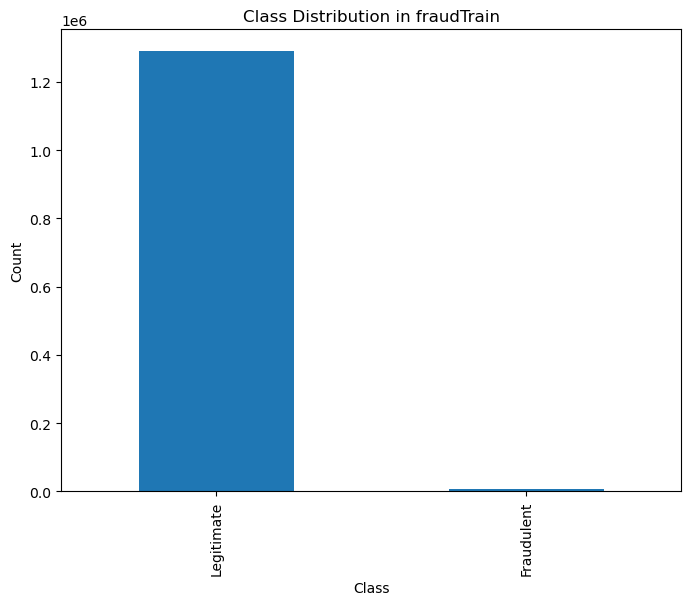

In [10]:
# Visualize class distribution in the training set
plt.figure(figsize=(8, 6))
fraudtrain['is_fraud'].value_counts().plot(kind='bar')
plt.title('Class Distribution in fraudTrain')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.show()


C:\Users\91630\AppData\Local\Temp\ipykernel_1408\1649496285.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = fraudtrain.corr()


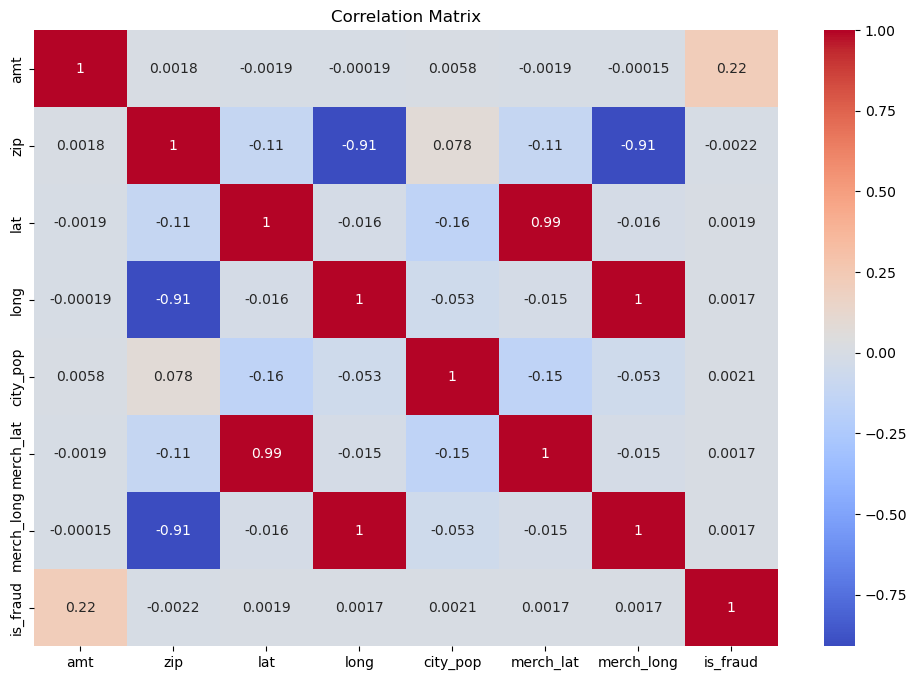

In [11]:
# Calculate the correlation matrix
correlation_matrix = fraudtrain.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


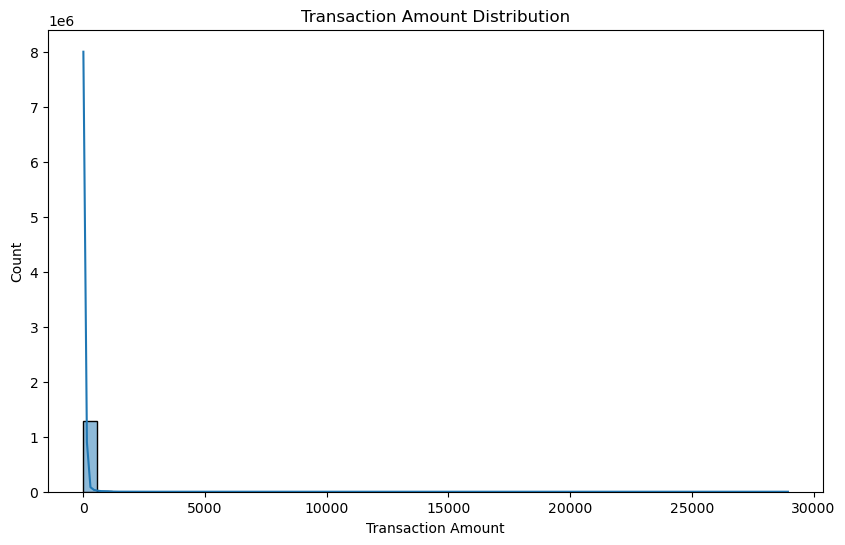

In [13]:
# Visualize the distribution of transaction amount
plt.figure(figsize=(10, 6))
sns.histplot(fraudtrain['amt'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.show()

In [15]:
fraudtrain.gender = [1 if value == "M" else 0 for value in fraudtrain.gender]
fraudtest.gender = [1 if value == "M" else 0 for value in fraudtest.gender]

In [16]:
X_train = fraudtrain.drop('is_fraud', axis=1)
X_test = fraudtest.drop('is_fraud', axis=1)
y_train = fraudtrain['is_fraud']
y_test = fraudtest['is_fraud']


In [17]:
# Define the feature columns and target column
feature_columns = ['amt', 'gender', 'zip', 'city_pop']
target_column = 'is_fraud'

# Create feature and target sets for training and testing data
X_train = fraudtrain[feature_columns]
y_train = fraudtrain[target_column]
X_test = fraudtest[feature_columns]
y_test = fraudtest[target_column]

# Create a Logistic Regression model
lr = LogisticRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [18]:
# After training the logistic regression model
feature_names = X_train.columns
coefficients = lr.coef_[0]  # Access coefficients

# Create a DataFrame to display the feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients in descending order
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the sorted DataFrame
print(coefficients_df)


    Feature  Coefficient  Absolute Coefficient
0       amt     0.000928              0.000928
2       zip    -0.000171              0.000171
1    gender    -0.000013              0.000013
3  city_pop    -0.000002              0.000002


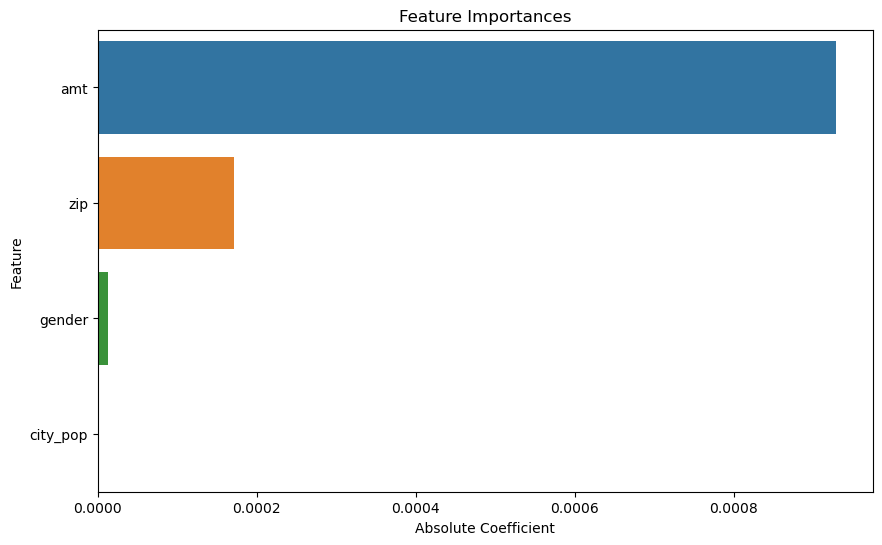

In [19]:

# After creating the coefficients_df DataFrame (as shown in the previous response)
# Assuming coefficients_df contains the feature names and their coefficients

# Sort the DataFrame by the absolute value of coefficients in descending order
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=coefficients_df, orient='h')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()
